<a href="https://colab.research.google.com/github/jazmichewcam/EDP1/blob/main/Metodo%20Explicito-%20Jaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuación de Onda- Metodo Explicito**



Problema de la Ecuación de Onda


La ecuación de onda unidimensional:

$$\frac{\partial^2 u}{\partial t^2}(x,t) - 4 \frac{\partial^2 u}{\partial x^2}(x,t) = 0, \quad 0 < x < 1, \quad t > 0
$$

Condiciones:


   -Contorno: $u(0,t) = u(1,t) = 0$

  -Iniciales:

  $u(x,0) = \sin(n\pi x)$, $0 \leq x \leq 1$

  $\dfrac{\partial u}{\partial t}(x,0) = 0$, $0 \leq x \leq 1$
        
Parámetros Numéricos:

$$
h = 0.1, \quad k = 0.01
$$

Solución Exacta:

$$
u(x,t) = \sin(\pi x) \cos(2\pi t)
$$



In [3]:
# Importacion de librerias importantes para el codigo
import numpy as np
import sympy as sp
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [4]:
# Datos del problema
alpha = 2.0  # Constante de velocidad en la ecuación de onda u_tt = alpha^2 * u_xx
h = 0.1      # Tamaño del paso espacial (delta x) en la discretización
k = 0.05     # Tamaño del paso temporal (delta t) en la discretización

Nx = int(1/h)    # Numero de pasos en x - calcula cuántos intervalos caben en el dominio [0,1]
Nt = 20          # Numero de pasos en el tiempo - iteraciones temporales a simular

In [5]:
# definimos la funcion de las condiciones
# y la solucion exacta

def u0(x): # Condición inicial de desplazamiento u(x,0)


    return np.sin(np.pi * x) # u(x,0) - Condición inicial: forma inicial de la onda

def ut0(x): #  Condición inicial de velocidad ∂u/∂t(x,0)


    return np.zeros_like(x) # du/dt(x,0) - Velocidad inicial nula: la onda parte del reposo

def u_ex(x, t): # Solución exacta de la ecuación de onda para comparación

    return np.sin(np.pi * x) * np.cos(2*np.pi*t) # sol exacta - Solución analítica conocida

In [6]:
# Definimos como funcion el metodo explicito
# de la ecuacion de onda, con los parametros

def metodo_explicito_onda(alpha, h, k, Nx, Nt, u0, ut0):
    x = np.linspace(0, 1, Nx+1)
    t = np.linspace(0, Nt*k, Nt+1)

    r = alpha*k/h

    U = np.zeros((Nt+1, Nx+1))

# como para la resolucion de esta ecuacion de onda
# se necesita un diferente tipo de particula
# es necesario definir unos detalles importantes
# para que se puedan calcular todos los puntos interiores
# sin problemas

    # n = 0
    U[0, :] = u0(x)
    U[:, 0]  = 0.0
    U[:, -1] = 0.0

    # n = 1
    for j in range(1, Nx):
        U[1, j] = (
            U[0, j]
            + k*ut0(x[j])
            + 0.5*(r**2)*(U[0, j+1] - 2*U[0, j] + U[0, j-1])
        )

    # n > 1
    for n in range(1, Nt):
        for j in range(1, Nx):
            U[n+1, j] = (
                2*(1 - r**2)*U[n, j]
                + r**2*(U[n, j+1] + U[n, j-1])
                - U[n-1, j]
            )

    return x, t, U

    x, t, U = metodo_explicito_onda(alpha, h, k, Nx, Nt, u0, ut0)


**Ejericio 1: Gráfica 2D**

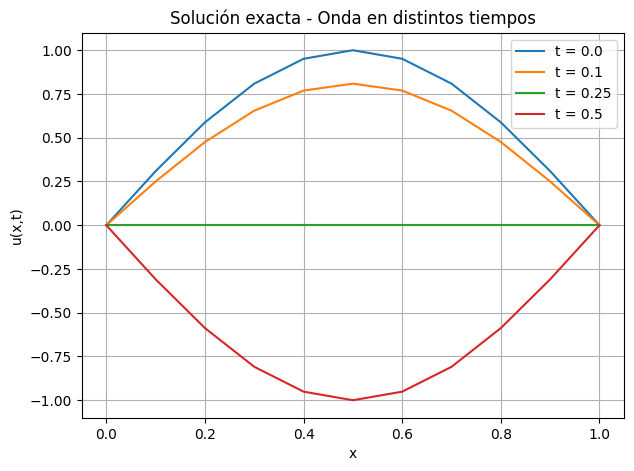

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# PRIMERO: Definir el vector espacial x
L = 1.0          # Longitud del dominio [0, 1]
h = 0.1          # Paso espacial
Nx = int(L / h)  # Número de intervalos

# Crear el vector x con Nx+1 puntos (incluye 0 y 1)
x = np.linspace(0, L, Nx + 1)

# Definir la función de solución exacta
def u_exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# LUEGO: Construir la gráfica
plt.figure(figsize=(7,5))

tiempos_plot = [0.0, 0.1, 0.25, 0.5]
for tt in tiempos_plot:
    plt.plot(x, u_exacta(x, tt), label=f"t = {tt}")

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solución exacta - Onda en distintos tiempos")
plt.grid(True)
plt.legend()
plt.show()

**Ejericio 1: Gráfica 3D**

t tiene 21 elementos
x tiene 11 elementos
U tiene dimensiones (21, 11)
t_plot tiene 11 elementos


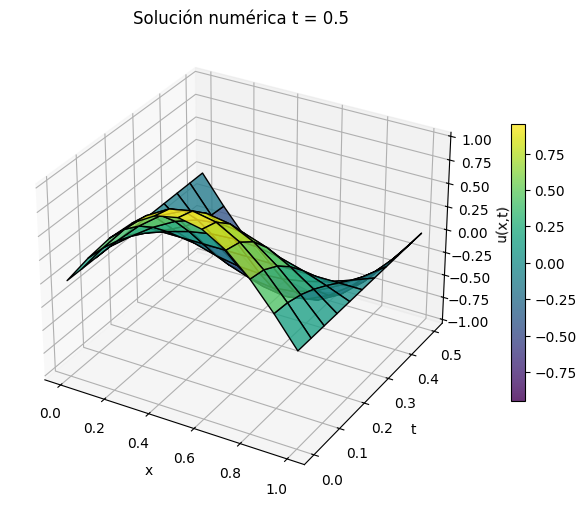

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Parámetros de discretización
h = 0.1      # Paso espacial
k = 0.05     # Paso temporal
L = 1.0      # Longitud del dominio espacial [0,1]
T_final = 1.0 # Tiempo final de simulación

# Crear vector de posiciones x
x = np.linspace(0, L, int(L/h) + 1)  # Puntos desde 0 hasta 1


t = np.linspace(0, T_final, int(T_final/k) + 1)  # Puntos desde 0 hasta T_final

# INICIALIZAR la matriz U (solución numérica)

U = np.zeros((len(t), len(x)))

# Llenar con datos de ejemplo (solución exacta)
for n in range(len(t)):
    for i in range(len(x)):
        U[n, i] = np.sin(np.pi * x[i]) * np.cos(2 * np.pi * t[n])


# construimos la grafica en 3D

# Crear máscara para seleccionar solo los tiempos hasta t=0.5
mask = t <= 0.5  # Array booleano: True para t <= 0.5, False para t > 0.5
t_plot = t[mask]  # Filtrar el vector de tiempos: solo t <= 0.5
U_plot = U[mask, :]  # Filtrar la matriz de solución: solo filas con t <= 0.5

# Verificar dimensiones
print(f"t tiene {len(t)} elementos")
print(f"x tiene {len(x)} elementos")
print(f"U tiene dimensiones {U.shape}")
print(f"t_plot tiene {len(t_plot)} elementos")

# Crear mallas 2D para graficación 3D
T, X = np.meshgrid(t_plot, x)  # T: matriz de tiempos, X: matriz de posiciones

# Transponer la matriz de solución
U_plot_T = U_plot.T   # para que coincidan dimensiones con X y T

# Crear figura y eje 3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Crear superficie 3D
surf = ax.plot_surface(X, T, U_plot_T, cmap=cm.viridis, edgecolor='k', alpha=0.8)

# Configurar etiquetas de los ejes
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")
ax.set_title("Solución numérica t = 0.5")

# Añadir barra de colores
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=20)

# Mostrar el gráfico
plt.show()

**Ejericio 2: Comparación**

In [15]:
# planteamos la tabla con la que compararemos

x_tabla = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
w_tabla = np.array([
    0.0000000000,
    0.3090169944,
    0.5877852523,
    0.8090169944,
    0.9510565163,
    1.0000000000,
    0.9510565163,
    0.8090169944,
    0.5877852523,
    0.3090169944,
    0.0000000000
])

n20 = 20
t_20 = n20 * k
u_num_t20 = U[n20, :]    # solución numérica para un t (t=1)


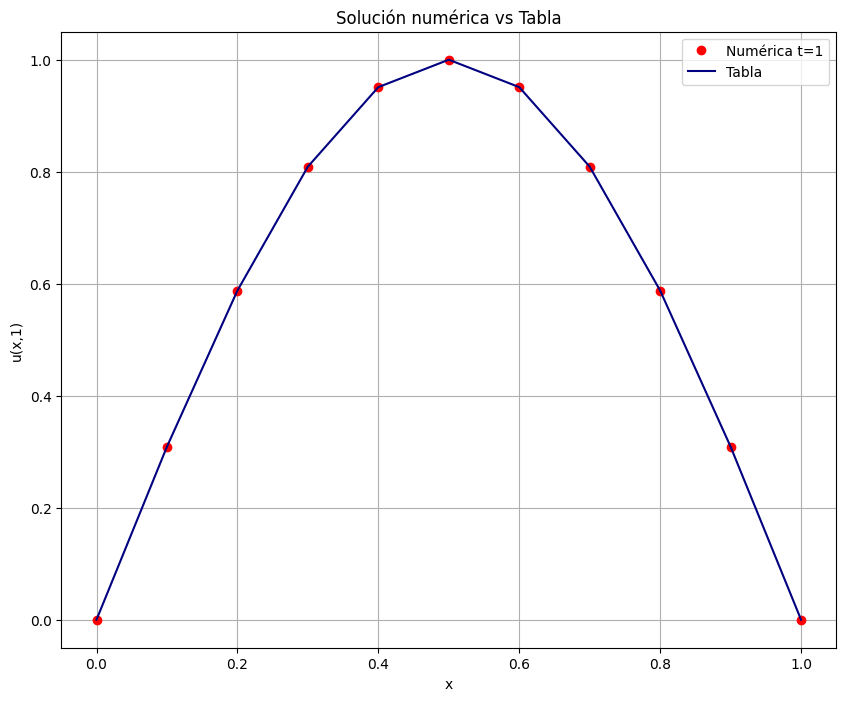

,x,U_num t=1,Tabla 12.6,Error absoluto
0,0.0,0.000000e+00,0.000000,0.000000e+00
1,0.1,3.090170e-01,0.309017,2.505263e-11
2,0.2,5.877853e-01,0.587785,7.526868e-12
3,0.3,8.090170e-01,0.809017,2.505252e-11
4,0.4,9.510565e-01,0.951057,4.846457e-12
5,0.5,1.000000e+00,1.000000,0.000000e+00
6,0.6,9.510565e-01,0.951057,4.846457e-12
7,0.7,8.090170e-01,0.809017,2.505252e-11
8,0.8,5.877853e-01,0.587785,7.526757e-12
9,0.9,3.090170e-01,0.309017,2.505252e-11


Error máximo Tabla 12.6 = 2.5052626639876507e-11


In [16]:
# Gráfica de la solucion numerica
plt.figure(figsize=(10,8))  # Crear figura de 10x8 pulgadas para buena visualización

# Graficar solución numérica con puntos circulares rojos
plt.plot(x, u_num_t20, 'o', color='red' ,label="Numérica t=1")
# 'o' marca cada punto discreto de la solución numérica
# u_num_t20 representa la solución numérica en el tiempo t=1

# Graficar solución de referencia de la tabla con línea azul
plt.plot(x_tabla, w_tabla, color='navy' ,label="Tabla")


plt.xlabel("x")
plt.ylabel("u(x,1)")      # Etiqueta del eje y (solución en tiempo t=1)
plt.title("Solución numérica vs Tabla")
plt.grid(True)
plt.legend()
plt.show()                # Mostrar el gráfico

# =============================================================================
# Tabla de comparación y calculo del error
# =============================================================================


df_tabla = pd.DataFrame({
    "x": x,                           # Vector de posiciones espaciales
    "U_num t=1": u_num_t20,           # Solución numérica en t=1
    "Tabla 12.6": w_tabla             # Valores de referencia de la tabla 12.6
})

# Calcular error absoluto entre solución numérica y valores de referencia
df_tabla["Error absoluto"] = np.abs(df_tabla["U_num t=1"] - df_tabla["Tabla 12.6"])
# Error absoluto = |valor_numerico - valor_referencia|

# Mostrar la tabla de comparación en el notebook
display(df_tabla)  # display() muestra el DataFrame formateado en Jupyter

# Imprimir el error máximo encontrado
print("Error máximo Tabla 12.6 =", df_tabla["Error absoluto"].max())
# Este valor indica la máxima discrepancia entre la solución numérica y la referencia

**Ejericio 3: Comparación con la solucion exacta**

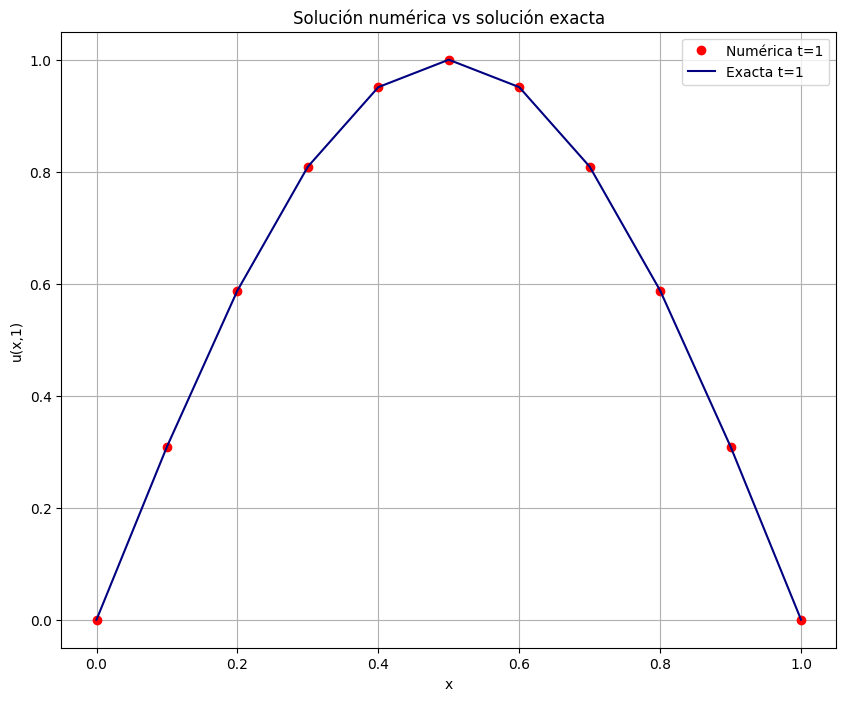

,x,U_num t=1,Exacta t=1,Error absoluto
0,0.0,0.000000,0.000000e+00,0.000000e+00
1,0.1,0.309017,3.090170e-01,5.551115e-17
2,0.2,0.587785,5.877853e-01,2.220446e-16
3,0.3,0.809017,8.090170e-01,0.000000e+00
4,0.4,0.951057,9.510565e-01,2.220446e-16
5,0.5,1.000000,1.000000e+00,0.000000e+00
6,0.6,0.951057,9.510565e-01,3.330669e-16
7,0.7,0.809017,8.090170e-01,0.000000e+00
8,0.8,0.587785,5.877853e-01,3.330669e-16
9,0.9,0.309017,3.090170e-01,5.551115e-17


Error máximo solución exacta = 3.3306690738754696e-16


In [ ]:
# Grafica de la solucion numerica y exacta

# Calcular la solución exacta en el tiempo t=20 (que corresponde a t=1 en tiempo real)
u_ex_t20 = u_ex(x, t_20)  # u_ex es la función de solución exacta, t_20 es el tiempo deseado

# Gráfica numérico vs exacta
plt.figure(figsize=(10,8))  # Crear figura de 10x8 pulgadas para buena visualización

# Graficar solución numérica con puntos circulares rojos
plt.plot(x, u_num_t20, "o", color='red' ,label="Numérica t=1")
# "o" - marcadores circulares para puntos discretos de la solución numérica
# u_num_t20 - solución numérica en el paso temporal 20 (equivalente a t=1)

# Graficar solución exacta con línea azul continua
plt.plot(x, u_ex_t20, color='navy',label="Exacta t=1")
# Línea continua que representa la solución analítica exacta


plt.xlabel("x")           # Etiqueta del eje x: posición espacial
plt.ylabel("u(x,1)")      # Etiqueta del eje y: valor de la solución en tiempo t=1
plt.title("Solución numérica vs solución exacta")  # Título descriptivo
plt.grid(True)            # Activar rejilla para mejor lectura de valores
plt.legend()              # Mostrar leyenda para identificar cada curva
plt.show()                # Mostrar el gráfico

# =============================================================================
# Tabla de comparación y cálculo de errores
# =============================================================================


df_exacta = pd.DataFrame({
    "x": x,                    # Columna con las posiciones espaciales
    "U_num t=1": u_num_t20,    # Columna con la solución numérica en t=1
    "Exacta t=1": u_ex_t20     # Columna con la solución exacta en t=1
})

# Calcular el error absoluto entre solución numérica y exacta
df_exacta["Error absoluto"] = np.abs(df_exacta["U_num t=1"] - df_exacta["Exacta t=1"])
# Error absoluto = |valor_numerico - valor_exacto| - siempre positivo

# Mostrar la tabla de comparación en el notebook (solo funciona en Jupyter)
display(df_exacta)  # Muestra el DataFrame formateado con todas las columnas

# Calcular y mostrar el error máximo encontrado
print("Error máximo solución exacta =", df_exacta["Error absoluto"].max())
# Esta métrica indica la peor discrepancia entre la solución numérica y la exacta

Al examinar los resultados, observamos que la solución numérica coincide notablemente con la solución exacta. Desde una perspectiva visual, las gráficas se superponen de manera casi perfecta, sin que se aprecien diferencias significativas a simple vista.

Al revisar los valores numéricos en la tabla de comparación, se confirma que las discrepancias entre ambos métodos son mínimas. La magnitud de los errores registrados es considerablemente reducida.

El indicador más relevante - el error máximo registrado en toda la simulación - resulta ser de una magnitud insignificante, lo que refuerza la conclusión sobre la efectividad del método.

**Ejercicio 4: Grafica Animada**

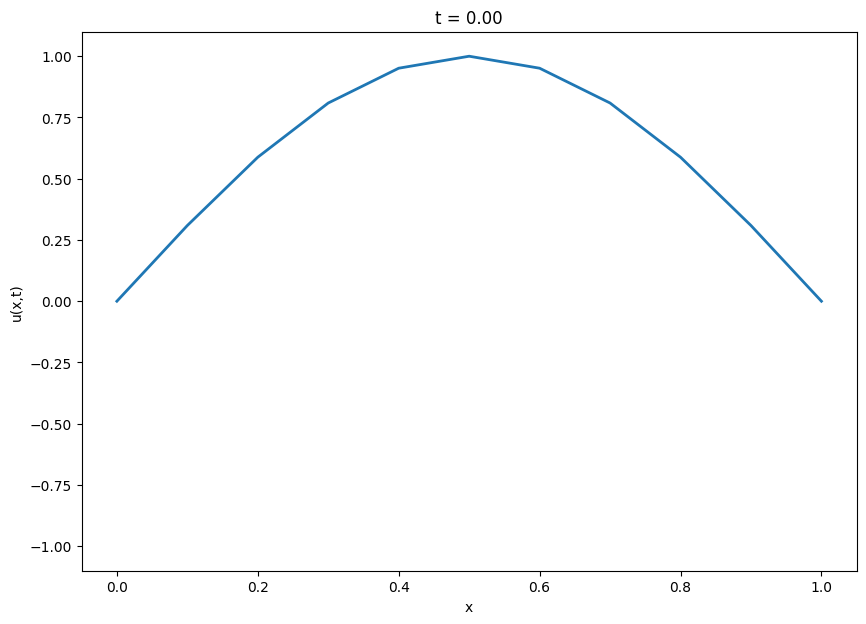

In [ ]:
# animacion de la onda

# Crear la figura y los ejes para la animación
fig, ax = plt.subplots(figsize=(10,7))  # Figura de 10x7 pulgadas

# Crear la línea inicial de la animación (primer frame en tiempo t=0)
line, = ax.plot(x, U[0, :], lw=2)

# Configurar los ejes y límites del gráfico
ax.set_xlabel("x")  # Etiqueta del eje horizontal (posición)
ax.set_ylabel("u(x,t)")  # Etiqueta del eje vertical (amplitud de la onda)

# Establecer límites del eje Y con un margen del 10% para mejor visualización
ax.set_ylim(np.min(U)*1.1, np.max(U)*1.1)

# Título inicial de la animación
ax.set_title("Evolución temporal")

# Función que actualiza cada frame de la animación
def update_frame(n):

    # Actualizar los datos de la onda con el perfil en el tiempo n
    line.set_ydata(U[n, :])

    # Actualizar el título mostrando el tiempo actual
    ax.set_title(f"t = {n*k:.2f}")  # Convierte índice a tiempo real

    return line,  # Retorna la línea actualizada

# Crear la animación
anim = FuncAnimation(fig, update_frame,
                    frames=Nt+1,  # Número total de frames (de 0 a Nt)
                    interval=100)  # Tiempo entre frames en milisegundos (100ms = 10 fps)

# Convertir la animación a HTML para visualizar en el notebook
HTML(anim.to_jshtml())